In [66]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, balanced_accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
pd.options.display.max_columns = 200
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [67]:
df = pd.read_csv('ecommerce_customer_data_large.csv')
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [68]:
df['Product Category'].unique()

array(['Home', 'Electronics', 'Books', 'Clothing'], dtype=object)

In [69]:
df['Payment Method'].unique()

array(['PayPal', 'Credit Card', 'Cash'], dtype=object)

In [70]:
df.shape

(250000, 13)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [72]:
df.apply(lambda col: col.unique())

Customer ID              [44605, 13738, 33969, 42650, 24053, 19676, 199...
Purchase Date            [2023-05-03 21:30:02, 2021-05-16 13:57:44, 202...
Product Category                      [Home, Electronics, Books, Clothing]
Product Price            [177, 174, 413, 396, 259, 191, 205, 370, 12, 4...
Quantity                                                   [1, 3, 4, 5, 2]
Total Purchase Amount    [2427, 2448, 2345, 937, 2598, 3722, 2773, 1486...
Payment Method                                 [PayPal, Credit Card, Cash]
Customer Age             [31, 27, 20, 53, 57, 34, 45, 18, 54, 21, 50, 2...
Returns                                                    [1.0, 0.0, nan]
Customer Name            [John Rivera, Lauren Johnson, Carol Allen, Cur...
Age                      [31, 27, 20, 53, 57, 34, 45, 18, 54, 21, 50, 2...
Gender                                                      [Female, Male]
Churn                                                               [0, 1]
dtype: object

In [73]:
df.select_dtypes(include='object')

,Purchase Date,Product Category,Payment Method,Customer Name,Gender
0,2023-05-03 21:30:02,Home,PayPal,John Rivera,Female
1,2021-05-16 13:57:44,Electronics,PayPal,John Rivera,Female
2,2020-07-13 06:16:57,Books,Credit Card,John Rivera,Female
3,2023-01-17 13:14:36,Electronics,Cash,John Rivera,Female
4,2021-05-01 11:29:27,Books,PayPal,John Rivera,Female
...,...,...,...,...,...
249995,2023-01-24 12:32:18,Home,Cash,Gabriel Williams,Male
249996,2021-06-04 05:45:25,Electronics,Credit Card,Barry Foster,Female
249997,2022-11-10 17:11:57,Electronics,Cash,Lisa Johnson,Female
249998,2021-06-27 14:42:12,Electronics,Cash,Melissa Fernandez,Male


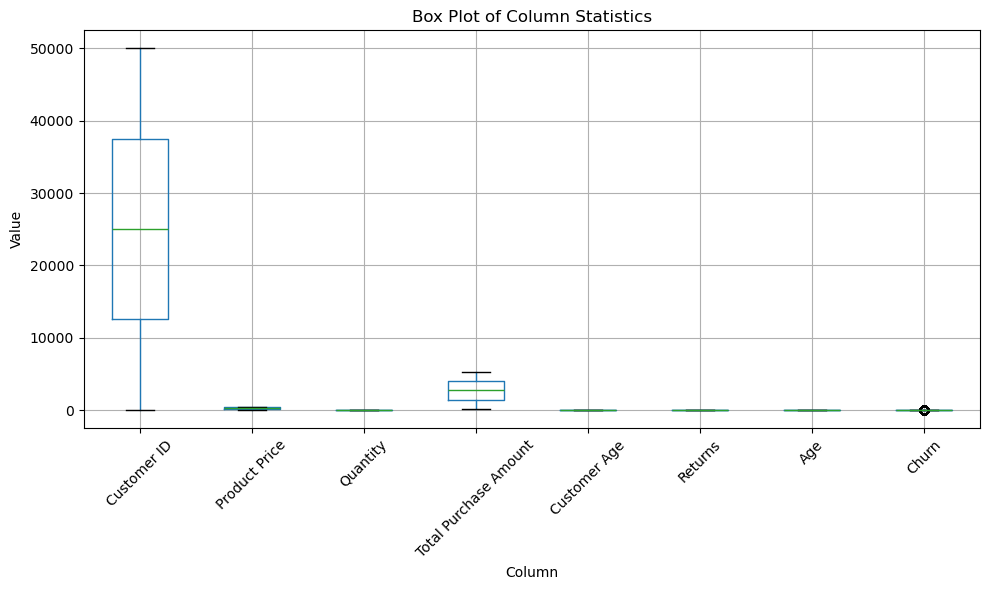

In [74]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Box Plot of Column Statistics')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Value')
plt.xlabel('Column')
plt.tight_layout()
plt.show()


In [75]:
df.dtypes

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                    object
Churn                      int64
dtype: object

In [76]:
df['Returns'].isna().sum()

47382

In [77]:
df['Returns'] = df['Returns'].fillna(0)

In [78]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [79]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.month

In [80]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Month
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,5
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,5
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,7
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0,1
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0,5


In [81]:
churn_counts = df['Churn'].value_counts()
churn_percentages = (churn_counts / churn_counts.sum()) * 100

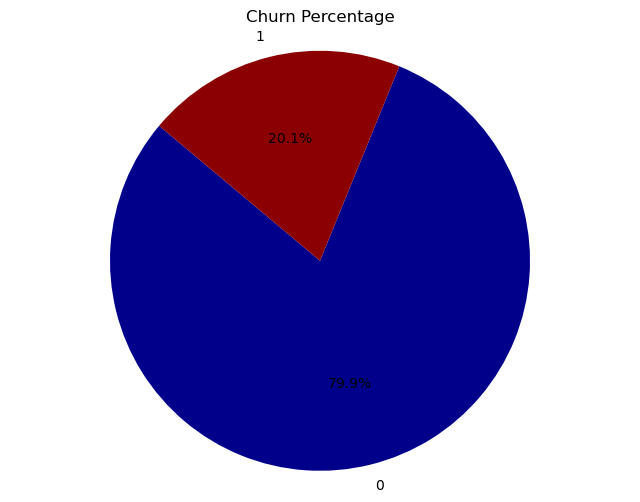

In [82]:
import matplotlib.pyplot as plt

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_percentages, labels=churn_percentages.index, autopct='%1.1f%%', startangle=140, colors=['#00008B', '#8B0000'])
plt.title('Churn Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

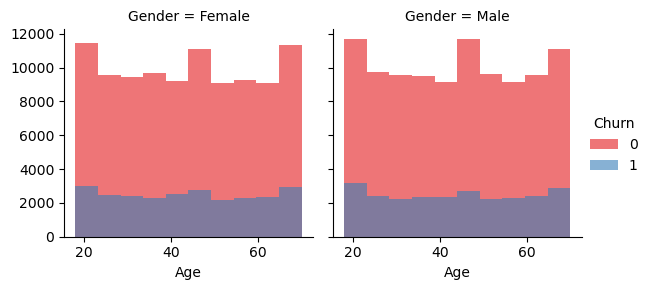

In [83]:
grid = sns.FacetGrid(df, col="Gender", hue="Churn", palette="Set1", col_wrap=2)
grid.map(plt.hist, "Age", alpha=0.6)
grid.add_legend()
plt.show()

In [84]:
df['Season'] = ''

df.loc[df['Month'].isin([12, 1, 2]), 'Season'] = 'Winter'
df.loc[df['Month'].isin([3, 4, 5]), 'Season'] = 'Spring'
df.loc[df['Month'].isin([6, 7, 8]), 'Season'] = 'Summer'
df.loc[df['Month'].isin([9, 10, 11]), 'Season'] = 'Autumn'

In [85]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Month,Season
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,5,Spring
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,5,Spring
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,7,Summer
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0,1,Winter
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0,5,Spring


In [86]:
df.groupby('Customer Name')['Total Purchase Amount'].sum()

Customer Name
Aaron Alexander    10727
Aaron Archer       11362
Aaron Armstrong     5150
Aaron Avery        20151
Aaron Avila        21088
                   ...  
Zoe Myers          18860
Zoe Torres          2809
Zoe Walker          3933
Zoe Watson          7019
Zoe Young           3599
Name: Total Purchase Amount, Length: 39878, dtype: int64

In [87]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Month,Season
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,5,Spring
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,5,Spring
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,7,Summer
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0,1,Winter
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0,5,Spring


<Axes: >

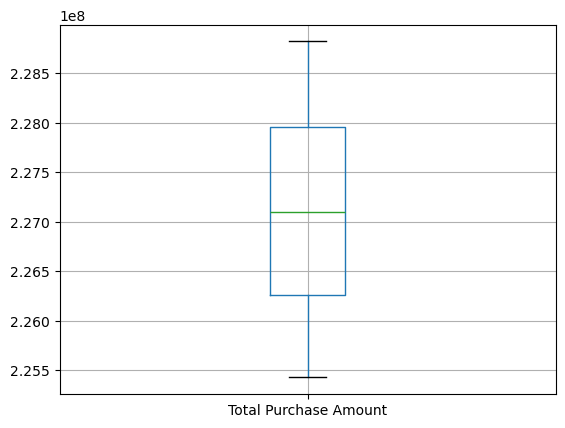

In [98]:
df.groupby('Payment Method')[['Total Purchase Amount']].sum().reset_index().boxplot()

In [46]:
df['Payment Method'].unique()

array(['PayPal', 'Credit Card', 'Cash'], dtype=object)

In [47]:
df['Product Category'].unique()

array(['Home', 'Electronics', 'Books', 'Clothing'], dtype=object)

In [48]:
df.replace(to_replace = ['Male','Female'],value = [0,1], inplace = True)

In [49]:
customer_names = df[['Customer Name','Customer ID']]

In [50]:
df = pd.get_dummies(df, columns=['Payment Method', 'Product Category','Season'])

In [51]:
df.head()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Customer Name,Age,Gender,Churn,Month,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,44605,2023-05-03 21:30:02,177,1,2427,31,1.0,John Rivera,31,1,0,5,0,0,1,0,0,0,1,0,1,0,0
1,44605,2021-05-16 13:57:44,174,3,2448,31,1.0,John Rivera,31,1,0,5,0,0,1,0,0,1,0,0,1,0,0
2,44605,2020-07-13 06:16:57,413,1,2345,31,1.0,John Rivera,31,1,0,7,0,1,0,1,0,0,0,0,0,1,0
3,44605,2023-01-17 13:14:36,396,3,937,31,0.0,John Rivera,31,1,0,1,1,0,0,0,0,1,0,0,0,0,1
4,44605,2021-05-01 11:29:27,259,4,2598,31,1.0,John Rivera,31,1,0,5,0,0,1,1,0,0,0,0,1,0,0


In [52]:
melted_df = pd.melt(df, id_vars=['Churn'], value_vars=['Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter'], var_name='Season')

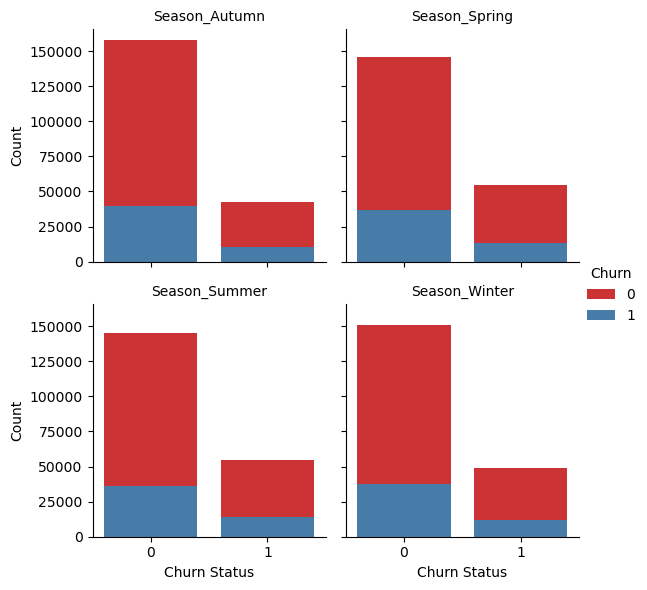

In [55]:
grid = sns.FacetGrid(melted_df, col="Season", hue="Churn", palette="Set1", col_wrap=2)

grid.map(sns.countplot, "value", order=[0, 1])

grid.add_legend()

grid.set_axis_labels("Churn Status", "Count")

grid.set_titles("{col_name}")

plt.show()

In [53]:
df.shape

(250000, 23)

In [581]:
df = df.drop(columns=['Customer Name','Customer ID'])
df = df.drop(columns=['Customer Age','Purchase Date','Month'])

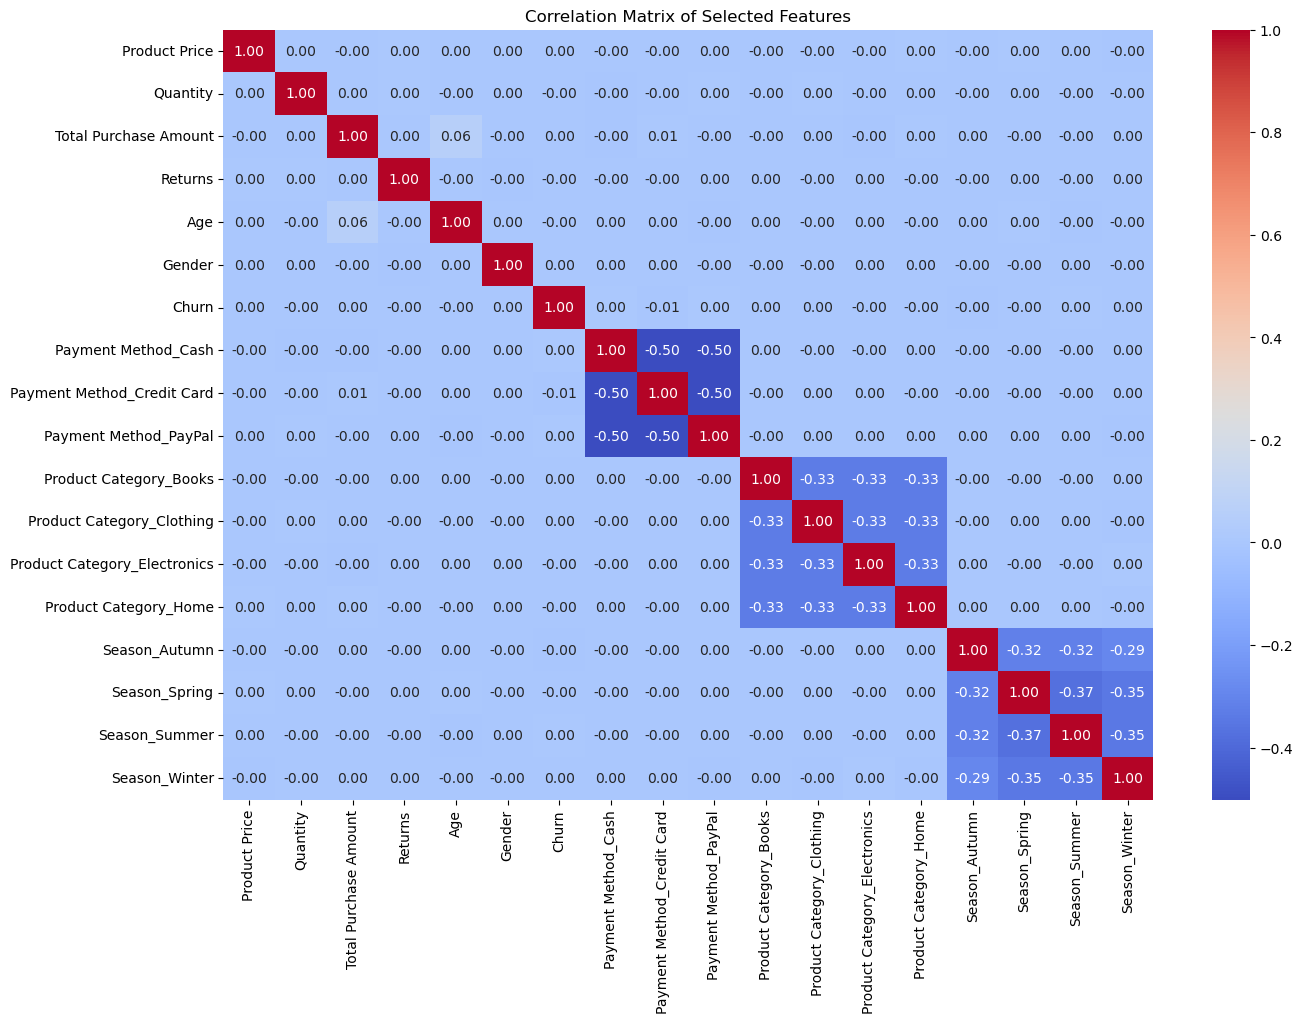

In [582]:
#Compute the correlation matrix

corr_matrix = df.corr()

#Plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [583]:
dfdata = df.copy()

In [56]:
df.shape

(250000, 23)

In [57]:
df.isna().sum().sum()

0

In [58]:
df.head()

,Customer ID,Purchase Date,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Customer Name,Age,Gender,Churn,Month,Payment Method_Cash,Payment Method_Credit Card,Payment Method_PayPal,Product Category_Books,Product Category_Clothing,Product Category_Electronics,Product Category_Home,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,44605,2023-05-03 21:30:02,177,1,2427,31,1.0,John Rivera,31,1,0,5,0,0,1,0,0,0,1,0,1,0,0
1,44605,2021-05-16 13:57:44,174,3,2448,31,1.0,John Rivera,31,1,0,5,0,0,1,0,0,1,0,0,1,0,0
2,44605,2020-07-13 06:16:57,413,1,2345,31,1.0,John Rivera,31,1,0,7,0,1,0,1,0,0,0,0,0,1,0
3,44605,2023-01-17 13:14:36,396,3,937,31,0.0,John Rivera,31,1,0,1,1,0,0,0,0,1,0,0,0,0,1
4,44605,2021-05-01 11:29:27,259,4,2598,31,1.0,John Rivera,31,1,0,5,0,0,1,1,0,0,0,0,1,0,0


In [ ]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle = True, stratify = y)

In [ ]:
df_train = X_train.copy()
df_train['Churn'] = y_train

In [ ]:
XY_train= (df_train.groupby("Churn", as_index = False)
        .apply(lambda x: x.sample(n = 35000))
        .reset_index(drop=True))

In [ ]:
X_train = XY_train.drop('Churn',axis = 1)
y_train = XY_train['Churn']

In [ ]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(class_report)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linearmodel import LogisticRegression
classifiers = [
    ('svm', SVC()),
    ('ada', AdaBoostClassifier()),
    ('lr', LogisticRegression())
]
for classifier in classifiers:
    pipe = Pipeline([
    ('feat_selection', SelectKBest()),
    (classifier)
    ])

    parameters = {
        'feat_selection__k' : [5,10]
        }
    CV = GridSearchCV(pipe, parameters, 
                  scoring='f1_macro') #5 splits https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    CV.fit(X_train, y_train)
    y_pred = CV.predict(X_test)
    print('===========================Classifier: ',classifier)
    print('F1_Score: ',f1_score(y_test, y_pred, average='macro'))
    print('The Best Results for Cross Validation are: ', CV.best_params)
    print()

In [ ]:
best_params = CV.best_params_

In [ ]:
best_params

In [ ]:
best_estimator = CV.best_estimator_

In [ ]:
select_kbest = best_estimator.named_steps['feat_selection']
selected_indices = select_kbest.get_support(indices=True)
selected_features = X_train.columns[selected_indices]

In [ ]:
print("Selected features:", selected_features)

In [ ]:
y_pred2 = svm.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred2)
class_report = classification_report(y_test, y_pred2)

print(accuracy)
print(class_report)

In [417]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
model_ada = abc.fit(X_train, y_train)

In [418]:
y_pred3 = svm.predict(X_test)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred3)
class_report = classification_report(y_test, y_pred3)

print(accuracy)
print(class_report)

0.7929466666666667
              precision    recall  f1-score   support

           0       0.80      0.62      0.70     59961
           1       0.20      0.38      0.26     15039

    accuracy                           0.58     75000
   macro avg       0.50      0.50      0.48     75000
weighted avg       0.68      0.58      0.61     75000



In [ ]:
===========================Classifier:  ('svm', SVC())
F1_Score:  0.4214486872800469
The Best Results for Cross Validation are:  {'feat_selectionk': 10}
===========================Classifier:  ('ada', AdaBoostClassifier())
F1_Score:  0.4629387228885673
The Best Results for Cross Validation are:  {'feat_selectionk': 5}
c:\Users\kathe\miniconda3\lib\site-packages\sklearn\linear_model_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\kathe\miniconda3\lib\site-packages\sklearn\linear_model_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\kathe\miniconda3\lib\site-packages\sklearn\linear_model_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

===========================Classifier:  ('lr', LogisticRegression())
F1_Score:  0.44814132344105795
The Best Results for Cross Validation are:  {'feat_selection__k': 10}

In [589]:
import shap

explainer = shap.Explainer(rf.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer:   0%|                                            | 25/75000 [00:13<46:52:14,  2.25s/it]


KeyboardInterrupt: 